Load all packages you need.

In [6]:
# Import essential data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics, model_selection
import sweetviz

# Enable matplotlib inline for Jupyter
%matplotlib inline

Read the data.

In [7]:
# Read the data from the /data/ directory
data = pd.read_csv('../data/diabetes.csv')

# Display the first few rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Inspect the histogram of "BloodPressure". What could be outlier values?


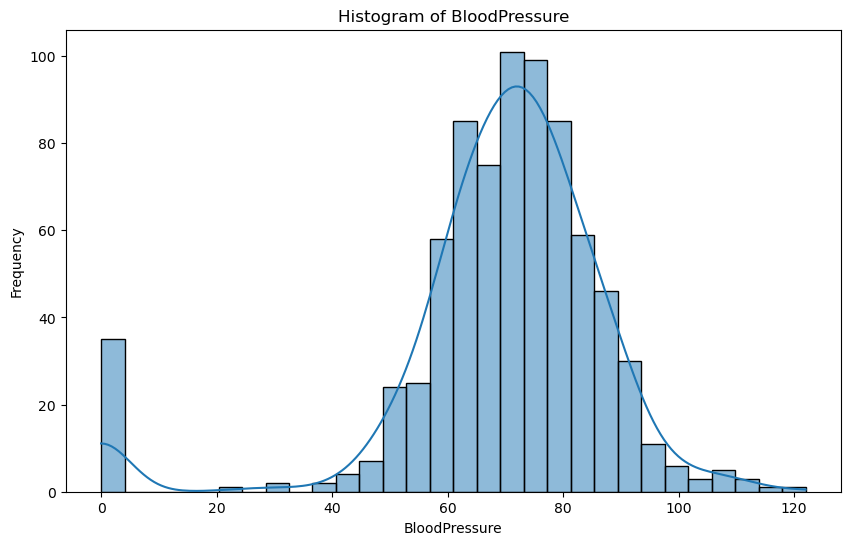

In [8]:
# Plot the histogram of "BloodPressure"
plt.figure(figsize=(10, 6))
sns.histplot(data['BloodPressure'], bins=30, kde=True)
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

Do you think the zero values are an outlier or missing data? How would the histogram look like without the zero values? Are there still outlier visible?

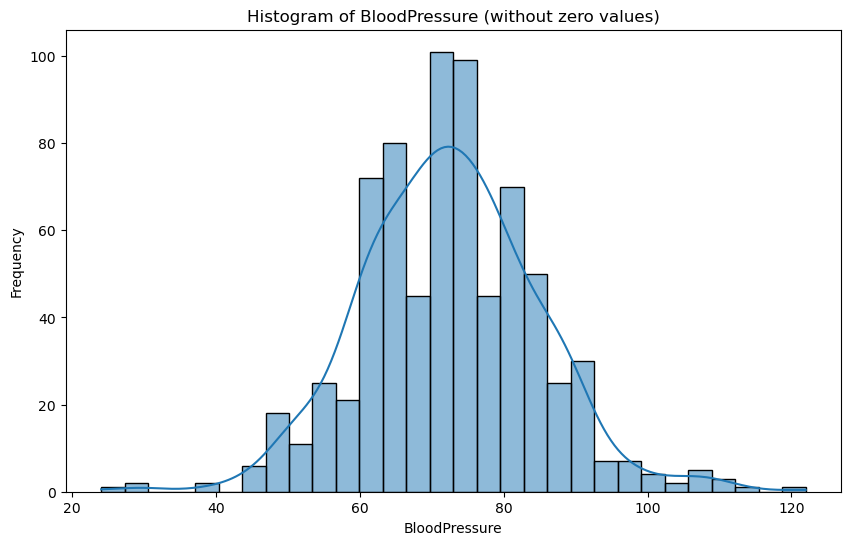

In [9]:
# Remove zero values from the "BloodPressure" column
data_no_zeros = data[data['BloodPressure'] != 0]

# Plot the histogram of "BloodPressure" without zero values
plt.figure(figsize=(10, 6))
sns.histplot(data_no_zeros['BloodPressure'], bins=30, kde=True)
plt.title('Histogram of BloodPressure (without zero values)')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

Let's use some more fine-grained methods to detect outlier. Create a Boxplot of "BloodPressure" and see if Tukey's fence reveals outlier!

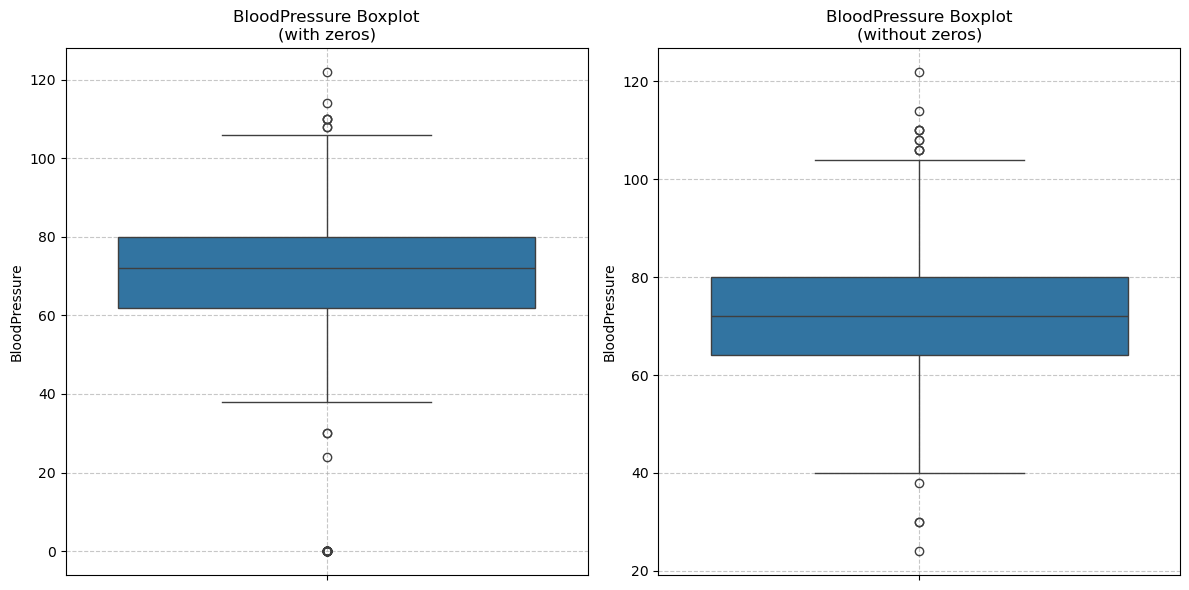

Tukey's Fence Boundaries: Lower = 40.00, Upper = 104.00
Number of outliers detected: 14

Outlier values:
[np.int64(24), np.int64(30), np.int64(38), np.int64(106), np.int64(108), np.int64(110), np.int64(114), np.int64(122)]


In [10]:
# Create a boxplot for BloodPressure
plt.figure(figsize=(12, 6))

# Create a boxplot using both datasets for comparison
plt.subplot(1, 2, 1)
sns.boxplot(y=data['BloodPressure'])
plt.title('BloodPressure Boxplot\n(with zeros)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_zeros['BloodPressure'])
plt.title('BloodPressure Boxplot\n(without zeros)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Calculate Tukey's fence for outlier detection
Q1 = data_no_zeros['BloodPressure'].quantile(0.25)
Q3 = data_no_zeros['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Define Tukey's fence boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using Tukey's fence
outliers = data_no_zeros[(data_no_zeros['BloodPressure'] < lower_bound) | 
                         (data_no_zeros['BloodPressure'] > upper_bound)]

print(f"Tukey's Fence Boundaries: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")
print(f"Number of outliers detected: {len(outliers)}")
if len(outliers) > 0:
    print("\nOutlier values:")
    print(sorted(outliers['BloodPressure'].unique()))

Can you think of a way to visualize the ±3SD method to detect outlier?

±3SD Method Boundaries: Lower = 35.26, Upper = 109.55
Number of outliers detected: 8

Outlier values:
[np.int64(24), np.int64(30), np.int64(110), np.int64(114), np.int64(122)]


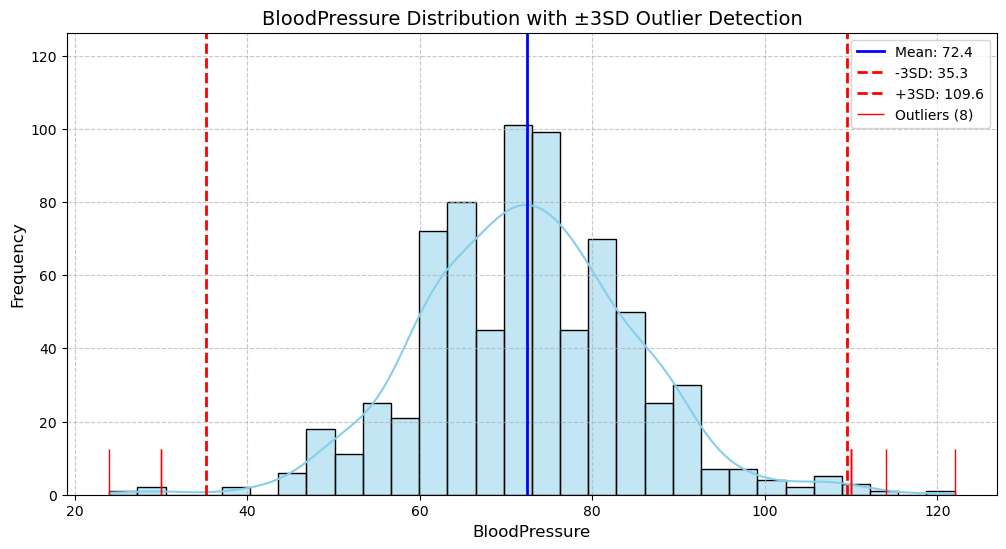

In [11]:
# Calculate mean and standard deviation for BloodPressure (excluding zeros)
mean_bp = data_no_zeros['BloodPressure'].mean()
std_bp = data_no_zeros['BloodPressure'].std()

# Define boundaries for the ±3SD method
lower_bound_3sd = mean_bp - 3 * std_bp
upper_bound_3sd = mean_bp + 3 * std_bp

# Identify outliers using the ±3SD method
outliers_3sd = data_no_zeros[(data_no_zeros['BloodPressure'] < lower_bound_3sd) | 
                            (data_no_zeros['BloodPressure'] > upper_bound_3sd)]

# Create a histogram with ±3SD boundaries highlighted
plt.figure(figsize=(12, 6))
sns.histplot(data_no_zeros['BloodPressure'], bins=30, kde=True, color='skyblue')

# Add vertical lines for mean and ±3SD boundaries
plt.axvline(mean_bp, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean_bp:.1f}')
plt.axvline(lower_bound_3sd, color='red', linestyle='--', linewidth=2, label=f'-3SD: {lower_bound_3sd:.1f}')
plt.axvline(upper_bound_3sd, color='red', linestyle='--', linewidth=2, label=f'+3SD: {upper_bound_3sd:.1f}')

# Highlight the outliers on the plot
if len(outliers_3sd) > 0:
    sns.rugplot(outliers_3sd['BloodPressure'], color='red', height=0.1, label=f'Outliers ({len(outliers_3sd)})')

plt.title('BloodPressure Distribution with ±3SD Outlier Detection', fontsize=14)
plt.xlabel('BloodPressure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Print outlier information
print(f"±3SD Method Boundaries: Lower = {lower_bound_3sd:.2f}, Upper = {upper_bound_3sd:.2f}")
print(f"Number of outliers detected: {len(outliers_3sd)}")
if len(outliers_3sd) > 0:
    print("\nOutlier values:")
    print(sorted(outliers_3sd['BloodPressure'].unique()))

Are the outliers detected by Tukey's Fence and ±3SD method identical? Test it!

Tukey's fence detected 8 outliers: [24, 30, 38, 106, 108, 110, 114, 122]
±3SD method detected 5 outliers: [24, 30, 110, 114, 122]

Common outliers in both methods: 5 values
Outliers only in Tukey's fence: 3 values
Outliers only in ±3SD method: 0 values


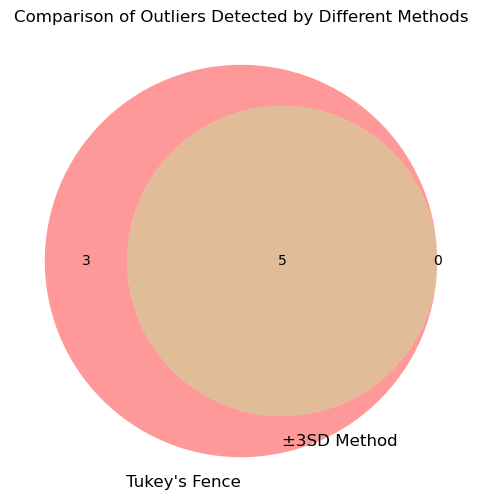

In [12]:
from matplotlib_venn import venn2

# Compare outliers detected by both methods
tukey_outliers = set(outliers['BloodPressure'])
sd3_outliers = set(outliers_3sd['BloodPressure'])

# Calculate common and unique outliers
common_outliers = tukey_outliers.intersection(sd3_outliers)
only_tukey = tukey_outliers - sd3_outliers
only_sd3 = sd3_outliers - tukey_outliers

# Display comparison
print(f"Tukey's fence detected {len(tukey_outliers)} outliers: {sorted(tukey_outliers)}")
print(f"±3SD method detected {len(sd3_outliers)} outliers: {sorted(sd3_outliers)}")
print(f"\nCommon outliers in both methods: {len(common_outliers)} values")
print(f"Outliers only in Tukey's fence: {len(only_tukey)} values")
print(f"Outliers only in ±3SD method: {len(only_sd3)} values")

# Visualize the comparison with a Venn diagram

plt.figure(figsize=(10, 6))
venn2(subsets=(len(only_tukey), len(only_sd3), len(common_outliers)),
    set_labels=("Tukey's Fence", "±3SD Method"))
plt.title("Comparison of Outliers Detected by Different Methods")
plt.show()